# Neural Network From Scratch

## Chapter 2:  Code Our First Neuron

### 2.1 A single Neuron
        General formula : y = x * w + b
        where, y = output
               x = input
               w = weight
               b = bias

In [1]:
inputs = [1,2,3]
weights = [0.2,0.8,-0.5]
bias = 2
output = (inputs[0] * weights[0]+
          inputs[1] * weights[1]+
          inputs[2] * weights[2]+ bias)
output

2.3

### A layer of Neuron
    For example: 3 neuron and 4 inputs

In [2]:
# input on neurons
inputs = [1, 2, 3, 2.5]

# weights on different neuron
weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

# bias of each neuron
bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
            #     Neuron 1
            inputs[0] * weights1[0]+
            inputs[1] * weights1[1]+
            inputs[2] * weights1[2]+
            inputs[3] * weights1[3]+ bias1,
    
                #     Neuron 2
            inputs[0] * weights2[0]+
            inputs[1] * weights2[1]+
            inputs[2] * weights2[2]+
            inputs[3] * weights2[3]+ bias2,
    
                #     Neuron 3
            inputs[0] * weights3[0]+
            inputs[1] * weights3[1]+
            inputs[2] * weights3[2]+
            inputs[3] * weights3[3]+ bias3,
]

outputs

[4.8, 1.21, 2.385]

In [12]:
# Dynamic coding
# input on neurons
inputs = [1, 2, 3, 2.5]

# weights on different neuron
weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]

# bias of each neuron
biases = [2, 3, 0.5]

# output of current layer
layer_output = []

# for each neuron
for neuron_weights, neuron_bias in zip(weights, biases):
    #  zeroed output of given neuron
    neuron_output = 0
    
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    
    #Add bias
    neuron_output += neuron_bias
    #append in list
    layer_output.append(neuron_output)

layer_output

[4.8, 1.21, 2.385]

In [13]:
# Dot product
a = [1, 2, 3]
b = [2, 3, 4]

dot_product = a[0] * b[0] + a[1] * b[1] + a[2] * b[2]

dot_product

20

### A Single Neuron with Numpy

In [3]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs = np.dot(weights, inputs) + bias

outputs

AttributeError: 'list' object has no attribute 'astype'

### A layer of Neuron with Numpy

In [1]:
import numpy as np

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
bias = [2.0, 3.0, 0.5]

layer_outputs = np.dot(weights, inputs) + bias

layer_outputs

array([4.8  , 1.21 , 2.385])

### A layer of Neurons & Batch of Data w/ Numpy

In [9]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]


weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

outputs = np.dot(inputs, np.array(weights).T) + biases
outputs

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

## Chapter 3 Adding Layers

### Adding the layer example input with 4 feature and a hidden layer with 3 neuron

In [10]:
inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]


weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2.0, 3.0, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]


layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

### Training Data

In [8]:
import nnfs
import numpy as np
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

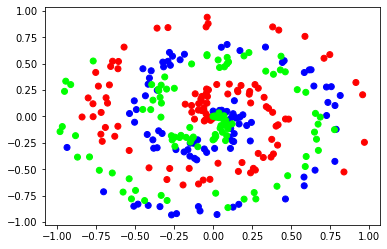

In [5]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='brg')
plt.show()

In [9]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.baises = np.zeros((1,n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs,self.weights) + self.baises
        


In [11]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

dense1.forward(X)

dense1.output


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.01753267e-05, -2.50496814e-05,  7.08966545e-05],
       [ 4.53214341e-07,  6.81245510e-05,  1.40924763e-04],
       [ 5.94710182e-05,  3.49831535e-04,  2.30411497e-05],
       [ 6.07281218e-05,  4.13309113e-04,  1.44117599e-04],
       [ 7.56669469e-05,  5.15734253e-04,  1.81189098e-04],
       [ 1.18747928e-04,  6.99424651e-04,  4.79496048e-05],
       [ 1.28909538e-04,  7.96533015e-04,  1.32161818e-04],
       [ 9.30378301e-05,  7.12466019e-04,  3.91219684e-04],
       [ 1.75846682e-04,  8.16417974e-04, -4.00572520e-04],
       [ 1.83559270e-04,  8.07602890e-04, -5.14089887e-04],
       [ 2.32685838e-04,  1.20864552e-03, -2.54102430e-04],
       [ 2.53438309e-04,  1.30817713e-03, -2.94533093e-04],
       [ 6.46123226e-05, -7.31917826e-05, -9.49581561e-04],
       [ 2.94377387e-04,  1.50045531e-03, -3.83045466e-04],
       [ 3.09115014e-04,  1.52129447e-03, -5.18933404e-04],
       [ 2.70090561e-04,  1.11212709e-03

## Chapter 4 Activation Functions

#### Two type of activation function
        1. activation used in hidden layer (might be same for all but not compulsary)
        2. activation used in output layer

#### ReLU Activation Function Code                                        

In [1]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []

for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [4]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

output = []

for i in inputs:

    output.append(max(0,i))

output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [7]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
output

array([0. , 2. , 0. , 3.3, 0. , 1.1, 2.2, 0. ])

In [10]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)


X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense1.forward(X)

activation1.forward(dense1.output)

print(activation1.output[:5])

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


#### Softmax Activation

In [3]:
# without numpy
layer_outputs = [4.8, 1.21, -2.385]

e = 2.71828182846

exp_values = []

for output in layer_outputs:
    exp_values.append(e**output)

norm_base = sum(exp_values)
norm_values = []

for values in exp_values:
    norm_values.append(values / norm_base)

# normalize betw 0 to 1
norm_values

[0.9724257028383375, 0.026837325858959028, 0.0007369713027034477]

In [11]:
# with numpy
import numpy as np

layer_outputs = [4.8, 1.21, -2.385]

exp_values = np.exp(layer_outputs)

print(exp_values)

norm_values = exp_values / np.sum(exp_values)

norm_values

[1.21510418e+02 3.35348465e+00 9.20889796e-02]


array([9.72425703e-01, 2.68373259e-02, 7.36971303e-04])

In [18]:
layer_out= [[4.8, 1.21, -2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]

print(np.sum(layer_out))
# axis 0 => 4.8 + 8.9 + 1.41 means its taking the value from each row so keepdim row
# axis 1 => 4.8 + 1.21 + (-2.385) means its taking the value from each columns so keepdim column  
print(np.sum(layer_out,axis=0, keepdims=True))

13.402
[[15.11   0.451 -2.159]]


In [19]:
# testing
class Activation_softmax:
    #forward pass 
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims= True)
        self.output = probabilities

softmax = Activation_softmax()

In [21]:
softmax.forward([[1,2,3]])
softmax.output

array([[0.09003057, 0.24472847, 0.66524096]])

In [22]:
softmax.forward([[1-3,2-3,3-3]])
softmax.output

array([[0.09003057, 0.24472847, 0.66524096]])

In [23]:
import nnfs
import numpy as np
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
nnfs.init()

In [24]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.baises = np.zeros((1,n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs,self.weights) + self.baises

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_softmax:
    #forward pass 
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims= True)
        self.output = probabilities

    


In [25]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)

activation2 = Activation_softmax()

dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


## Chapter 5 Calculating Network Error with Loss

In [1]:
import math 

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

loss = -(math.log(softmax_output[0])*target_output[0] +
        math.log(softmax_output[1])*target_output[1]+
        math.log(softmax_output[2])*target_output[2])
loss

0.35667494393873245

In [1]:
import numpy as np

In [4]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                    [0.1, 0.5, 0.4],
                    [0.02, 0.9, 0.08]])
class_targets = [0, 1, 1]

In [5]:
softmax_outputs[[0,1,2],class_targets]

array([0.7, 0.5, 0.9])

In [7]:
-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])

array([0.35667494, 0.69314718, 0.10536052])

In [8]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                    [0.1, 0.5, 0.4],
                    [0.02, 0.9, 0.08]])
class_targets = np.array([[1,0,0],
                           [0,1,0],
                            [0,1,0]])

In [11]:
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)),
        class_targets
        ]

elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs * class_targets,
        axis=1
    )
neg_log = -np.log(correct_confidences)
avg_log = np.mean(neg_log)
avg_log

0.38506088005216804

In [13]:
-np.log(0)

C:\Users\yukes\AppData\Local\Temp\ipykernel_7904\2869289095.py:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)


inf

In [11]:
# Accuracy calculation
import numpy as np

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                    [0.1, 0.5, 0.4],
                    [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])

In [12]:
# argmax takes the highest and provide the label in array
predictions = np.argmax(softmax_outputs, axis=1)
predictions

array([0, 1, 1], dtype=int64)

In [13]:
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
    print(class_targets)

In [14]:
accuracy = np.mean(predictions==class_targets)
accuracy

1.0

## FEED FORWARD NEURAL NETWORK

In [16]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [17]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)


# Softmax activation
class Activation_softmax:
    #forward pass 
    def forward(self, inputs):
        # Get unnormalized probabilities 
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalized them for each samples
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims= True)
        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    #  given model output and ground truth values
    def calculate(self, output, y):

        # Calculate samples losses
        sample_losses =self.forward(output, y)
        
        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    #  Forward pass
    def forward(self, y_pred, y_true):
        
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean toward any values 
        y_pred_clipped = np.clip(y_pred,1e-7,1- 1e-7)

        #  Probabilities for target values
        #  Only if categorical lables
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
                ]

        # Mask values - only for one hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods  

In [18]:

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 inputs features and  3 output values 
dense1 = Layer_Dense(2,3)

#  Create ReLU activation 
activation1 = Activation_ReLU()

# Create the second dense layer with 3 inputs features

dense2 = Layer_Dense(3,3)

# Create the softmax activation function
activation2 = Activation_softmax()

# Create loss function 
loss_function = Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass  through activation function 
# Takes the output of the first dense layer
activation1.forward(dense1.output)

# Perform a forward pass  through second Dense layer
# Takes the output of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass  through activation function 
# Takes the output of the second dense layer
activation2.forward(dense2.output)

# output of some samples
print(activation2.output[:5])

# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)


print('Loss:',loss)

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
Loss: 1.0986104


In [19]:
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)


if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

# Print accuracy
accuracy = np.mean( predictions== y)

print('accuracy: ',accuracy)

accuracy:  0.34


## Chapter 6 Introducing Optimization

#### 1. first option might be random changing the weights, checking the loss, and repeating this until lowest loss found

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

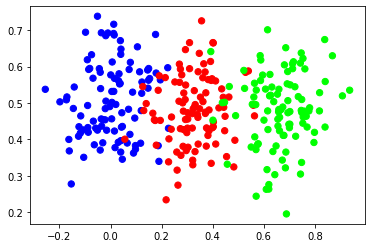

In [2]:


plt.scatter(X[:,0],X[:,1],c=y, s=40, cmap='brg')
plt.show()

In [8]:
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)


# Softmax activation
class Activation_softmax:
    #forward pass 
    def forward(self, inputs):
        # Get unnormalized probabilities 
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalized them for each samples
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims= True)
        self.output = probabilities

# Common loss class
class Loss:

    # Calculates the data and regularization losses
    #  given model output and ground truth values
    def calculate(self, output, y):

        # Calculate samples losses
        sample_losses =self.forward(output, y)
        
        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    #  Forward pass
    def forward(self, y_pred, y_true):
        
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean toward any values 
        y_pred_clipped = np.clip(y_pred,1e-7,1- 1e-7)

        #  Probabilities for target values
        #  Only if categorical lables
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
                ]

        # Mask values - only for one hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods  

In [9]:
X, y = vertical_data(samples=100, classes=3)

# Create Dense layer with 2 inputs features and  3 output values 
dense1 = Layer_Dense(2,3)

#  Create ReLU activation 
activation1 = Activation_ReLU()

# Create the second dense layer with 3 inputs features

dense2 = Layer_Dense(3,3)

# Create the softmax activation function
activation2 = Activation_softmax()

# Create loss function 
loss_function = Loss_CategoricalCrossentropy()


In [10]:
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [12]:
for iteration in range(10000):

    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output,y)

    predictions = np.argmax(activation2.output, axis=1)

    # Print accuracy
    accuracy = np.mean( predictions== y)


    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
                'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()        

New set of weights found, iteration: 0 loss: 1.0984284 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0929897 acc: 0.3333333333333333
New set of weights found, iteration: 153 loss: 1.0902599 acc: 0.31333333333333335
New set of weights found, iteration: 154 loss: 1.089233 acc: 0.33
New set of weights found, iteration: 177 loss: 1.088917 acc: 0.3333333333333333
New set of weights found, iteration: 893 loss: 1.0503341 acc: 0.42
New set of weights found, iteration: 898 loss: 1.0294942 acc: 0.48
New set of weights found, iteration: 900 loss: 1.0129408 acc: 0.4266666666666667
New set of weights found, iteration: 911 loss: 1.0036229 acc: 0.35
New set of weights found, iteration: 995 loss: 1.0030105 acc: 0.3566666666666667
New set of weights found, iteration: 996 loss: 0.9349467 acc: 0.37
New set of weights found, iteration: 997 loss: 0.92071146 acc: 0.37
New set of weights found, iteration: 998 loss: 0.87811714 acc: 0.39666666666666667
New set of weights found, iterat

## Chapter 7 Derivatives

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x

In [2]:
x = np.array(range(5))
y = f(x)
print(x)
print(y)

[0 1 2 3 4]
[0 2 4 6 8]


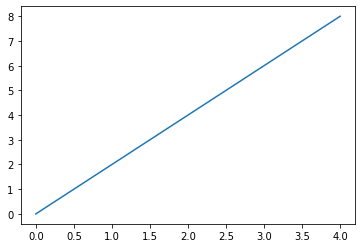

In [3]:
# linear function
plt.plot(x,y)
plt.show()

In [4]:
def f(x):
    return 2*x**2

In [5]:
x = np.array(range(5))
y = f(x)
print(x)
print(y)

[0 1 2 3 4]
[ 0  2  8 18 32]


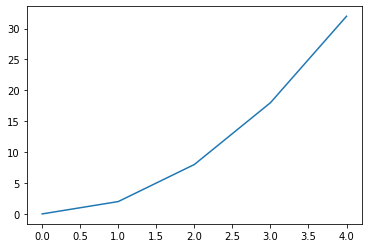

In [7]:
# non-linear function
plt.plot(x,y)
plt.show()

## Chapter 9 Backpropagation

#### simple single neuron test for backpropagation

In [2]:
# forward pass 
x = [1.0, -2.0, 3.0] # input values
w = [-3.0,-1.0, 2.0] # output values
b = 1.0 # bias

# Multiply input and weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted input and a bias
z = xw0 + xw1 + xw2 + b

#  Relu activation function
y = max(z,0)

# Backward pass

dvalue = 1.0
drelu_dz = dvalue * (1. if z > 0 else 0)
print(drelu_dz)

1.0


#### Partial derivative for single neuron

In [5]:
# forward pass 
x = [1.0, -2.0, 3.0] # input values
w = [-3.0,-1.0, 2.0] # output values
b = 1.0 # bias

# Multiply input and weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted input and a bias
z = xw0 + xw1 + xw2 + b

#  Relu activation function
y = max(z,0)

# Backward pass

dvalue = 1.0
drelu_dz = dvalue * (1. if z > 0 else 0)
print(drelu_dz)

# Partial derivative of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)


# partial derivative 
dmul_dx0 = w[0]
dmul_dw0 = x[0]

dmul_dx1 = w[1]
dmul_dw1 = x[1]

dmul_dx2 = w[2]
dmul_dw2 = x[2]

drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0

drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1

drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2

print(drelu_dx0,drelu_dw0)
print(drelu_dx1,drelu_dw1)
print(drelu_dx2,drelu_dw2)

1.0
1.0 1.0 1.0 1.0
-3.0 1.0
-1.0 -2.0
2.0 3.0


In [6]:
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db

print(w,b)

[-3.001, -0.998, 1.997] 0.999


In [7]:
# Multiply input and weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted input and a bias
z = xw0 + xw1 + xw2 + b

#  Relu activation function
y = max(z,0)
y

5.985

In [1]:
import numpy as np

dvalues = np.array([[1.,1.,1.]])

In [6]:
# we have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weigts 
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, -0.26, -0.5],
                    [-0.26, -0.27, -0.17, 0.87]]).T

In [7]:
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dx0 = sum(weights[0])*dvalues[0]
dx1 = sum(weights[1])*dvalues[0]
dx2 = sum(weights[2])*dvalues[0]
dx3 = sum(weights[3])*dvalues[0]

dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

[[ 0.44  0.44  0.44]
 [-0.38 -0.38 -0.38]
 [-0.93 -0.93 -0.93]
 [ 1.37  1.37  1.37]]


#### batch of sample

In [1]:
import numpy as np

In [3]:
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[ 1. , 1. , 1. ],
[ 2. , 2. , 2. ],
[ 3. , 3. , 3. ]])

In [4]:
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ],
                    [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
                    [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T

In [5]:
dinputs = np.dot(dvalues, weights.T)
print (dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


In [6]:
import numpy as np
# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[ 1. , 1. , 1. ],
                    [ 2. , 2. , 2. ],
                    [ 3. , 3. , 3. ]])
# We have 3 sets of inputs - samples
inputs = np.array([[ 1 , 2 , 3 , 2.5 ],
                    [ 2. , 5. , - 1. , 2 ],
                    [ - 1.5 , 2.7 , 3.3 , - 0.8 ]])
# sum weights of given input
# and multiply by the passed in gradient for this neuron
dweights = np.dot(inputs.T, dvalues)
print (dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


#### Relu

In [7]:
import numpy as np
# Example layer output
z = np.array([[ 1 , 2 , - 3 , - 4 ],
            [ 2 , - 7 , - 1 , 3 ],
            [ - 1 , 2 , 5 , - 1 ]])
dvalues = np.array([[ 1 , 2 , 3 , 4 ],
                    [ 5 , 6 , 7 , 8 ],
                    [ 9 , 10 , 11 , 12 ]])
# ReLU activation's derivative
drelu = np.zeros_like(z)
drelu[z > 0 ] = 1
print (drelu)
# The chain rule
drelu *= dvalues
print (drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [9]:
import numpy as np

# Passed in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[ 1. , 1. , 1. ],
                    [ 2. , 2. , 2. ],
                    [ 3. , 3. , 3. ]])


# We have 3 sets of inputs - samples
inputs = np.array([[ 1 , 2 , 3 , 2.5 ],
                    [ 2. , 5. , - 1. , 2 ],
                    [ - 1.5 , 2.7 , 3.3 , - 0.8 ]])


# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[ 0.2 , 0.8 , - 0.5 , 1 ],
                    [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
                    [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]).T


# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[ 2 , 3 , 0.5 ]])

# Forward pass
layer_outputs = np.dot(inputs, weights) + biases # Dense layer
relu_outputs = np.maximum( 0 , layer_outputs) # ReLU activation


# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0 ] = 0

# Dense layer
# dinputs - multiply by weights
dinputs = np.dot(drelu, weights.T)
# dweights - multiply by inputs
dweights = np.dot(inputs.T, drelu)

# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(drelu, axis = 0 , keepdims = True )

# Update parameters
weights += - 0.001 * dweights
biases += - 0.001 * dbiases

print (weights)
print (biases)

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


#### Categorical Cross entropy loss derivative code

In [5]:
import numpy as np
np.eye( 5 )[1]

array([0., 1., 0., 0., 0.])

#### Softmax activation derivative code implementation

In [1]:
import numpy as np
softmax_output = [ 0.7 , 0.1 , 0.2 ]

In [6]:
softmax_output = np.array(softmax_output).reshape( - 1 , 1 )
print ( softmax_output)

[[0.7]
 [0.1]
 [0.2]]


In [10]:
# simple way
np.eye(softmax_output.shape[0])
softmax_output * np.eye(softmax_output.shape[ 0 ])

array([[0.7, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.2]])

In [12]:
# mult diagonal 1 array with array in same code
print ( np.diagflat(softmax_output))

[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]


In [13]:
print ( np.dot(softmax_output, softmax_output.T))

[[0.49 0.07 0.14]
 [0.07 0.01 0.02]
 [0.14 0.02 0.04]]


In [14]:
print ( np.diagflat(softmax_output) -
np.dot(softmax_output, softmax_output.T))

[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


In [21]:
import numpy as np
y_true = np.array([[ 1 ,1, 1 ],[ 1 , 1, 1 ],[ 1 , 1 ,1]])
np.argmax(y_true)

0

In [22]:
print ( np.argmax(y_true, axis = 1 ))

[0 0 0]


#### Full model code

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

In [3]:
# Dense layer
class Layer_Dense :
# Layer initialization
    def __init__ ( self , n_inputs , n_neurons ):
    # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
    
    # Forward pass
    def forward ( self , inputs ):
    # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
    
    # Backward pass
    def backward ( self , dvalues ):
    # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis = 0 , keepdims = True )
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

In [4]:
# ReLU activation
class Activation_ReLU :
# Forward pass
    def forward ( self , inputs ):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum( 0 , inputs)
# Backward pass
    def backward ( self , dvalues ):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0 ] = 0

In [ ]:
class Activation_Softmax:
    # Forward pass
def forward ( self , inputs ):
# Remember input values
self.inputs = inputs
# Get unnormalized probabilities
exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,
keepdims = True ))
# Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis = 1 ,
keepdims = True )
self.output = probabilities
    # Backward pass
    def backward ( self , dvalues ):
    # Create uninitialized array
    self.dinputs = np.empty_like(dvalues)
    # Enumerate outputs and gradients
    for index, (single_output, single_dvalues) in \
    enumerate ( zip (self.output, dvalues)):
    # Flatten output array
    single_output = single_output.reshape( - 1 , 1 )
    # Calculate Jacobian matrix of the output and
    jacobian_matrix = np.diagflat(single_output) - \
    np.dot(single_output, single_output.T)
    # Calculate sample-wise gradient
    # and add it to the array of sample gradients
    self.dinputs[index] = np.dot(jacobian_matrix,
    single_dvalues)